<a href="https://colab.research.google.com/github/phamhoangtin/C4E_Python_Books/blob/master/Covid19_tweet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/My Drive/Colab Notebooks/D4E_data_analyst/covid19_tweets.csv.zip" -d "/content/sample_data"

Archive:  /content/drive/My Drive/Colab Notebooks/D4E_data_analyst/covid19_tweets.csv.zip
  inflating: /content/sample_data/covid19_tweets.csv  


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df_covid = pd.read_csv("/content/sample_data/covid19_tweets.csv")

In [ ]:
df_covid.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


These tweets are collected using Twitter API and a Python script. A query for this high-frequency hashtag (#covid19) is run on a daily basis for a certain time period, to collect a larger number of tweets samples.
The tweets have #covid19 hashtag. Collection started on 25/7/2020, with an initial 17k batch and will continue on a daily basis.

### kiểm tra toàn bộ dataset

In [ ]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


### thống kê giá trị trống mỗi cột



```
amount_null = df_covid[col].isnull().sum()
total_amount = len(df_covid)
percent = 100*(amount_null/total_amount)
percent = rount(percent,2)
```



In [ ]:
missed = pd.DataFrame()
missed['column'] = df_covid.columns
missed['percent'] = [round(100* df_covid[col].isnull().sum() / len(df_covid), 2) for col in df_covid.columns]



### tính phần trăm rỗng mỗi cột và sắp xếm theo percent, và chỉ lấy những cột lớn hơn 0

In [ ]:
missed = missed.sort_values('percent')
missed = missed[missed['percent']>0]

In [ ]:
missed

,column,percent
11,source,0.04
2,user_description,5.74
1,user_location,20.53
10,hashtags,28.66


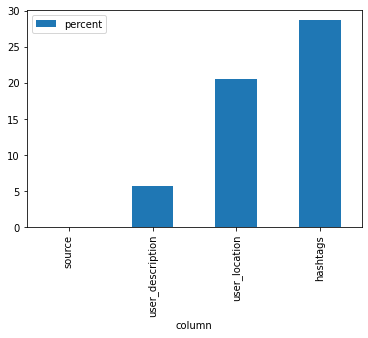

In [ ]:
missed.plot(kind = 'bar', x = 'column', y ='percent' )

### xử lý việc thiếu dữ liệu


#### xóa bỏ dòng bị thiếu


<img src='https://miro.medium.com/max/478/1*8JcQbPb86ZNIzeeUgWva2w.png'>
<br>


1.   how = 'all': tất cả cột bị thiếu mới xóa<br>
    how ='any' : chỉ 1 cột bị thiếu cũng xóa
    
2.   axis = 0 : theo chiều ngang, =1 là theo chiều dọc
3.   inplace:  thay thế vào chính thằng nào đang gọi hàm



#### thay thế bằng một giá trị khác


```
df.fillna(value)
```
<img src = "https://miro.medium.com/max/700/1*jNpCcy6oiV1xRO_KsyQA_Q.png"> 
<br>
hoặc dùng hàm "ffill" : thay thế giá trị trước đó
"bfill" thay thế giá trị sau nó

<img src = "https://miro.medium.com/max/390/1*1ZdUVVXfVJR2olroxFEwvg.png">


### tìm top 40 username đăng nhiều nhất

In [ ]:
df_user = df_covid['user_name'].value_counts().reset_index()

In [ ]:
df_user

,index,user_name
0,GlobalPandemic.NET,679
1,Coronavirus Updates,625
2,covidnews.ch,402
3,Open Letters,390
4,Blood Donors India,282
...,...,...
92271,Ornella Garrone,1
92272,Sameer Naqvi,1
92273,June Spring,1
92274,Community Living Hamilton,1


In [ ]:
df_user.columns = ["name", "size"]

In [ ]:
df_user

,name,size
0,GlobalPandemic.NET,679
1,Coronavirus Updates,625
2,covidnews.ch,402
3,Open Letters,390
4,Blood Donors India,282
...,...,...
92271,Ornella Garrone,1
92272,Sameer Naqvi,1
92273,June Spring,1
92274,Community Living Hamilton,1


In [ ]:
df_user = df_user.nlargest(10,'size')

In [ ]:
df_user

,name,size
0,GlobalPandemic.NET,679
1,Coronavirus Updates,625
2,covidnews.ch,402
3,Open Letters,390
4,Blood Donors India,282
5,Hindustan Times,280
6,IAM Platform,266
7,Paperbirds_Coronavirus,259
8,IANS Tweets,244
9,ANI,233


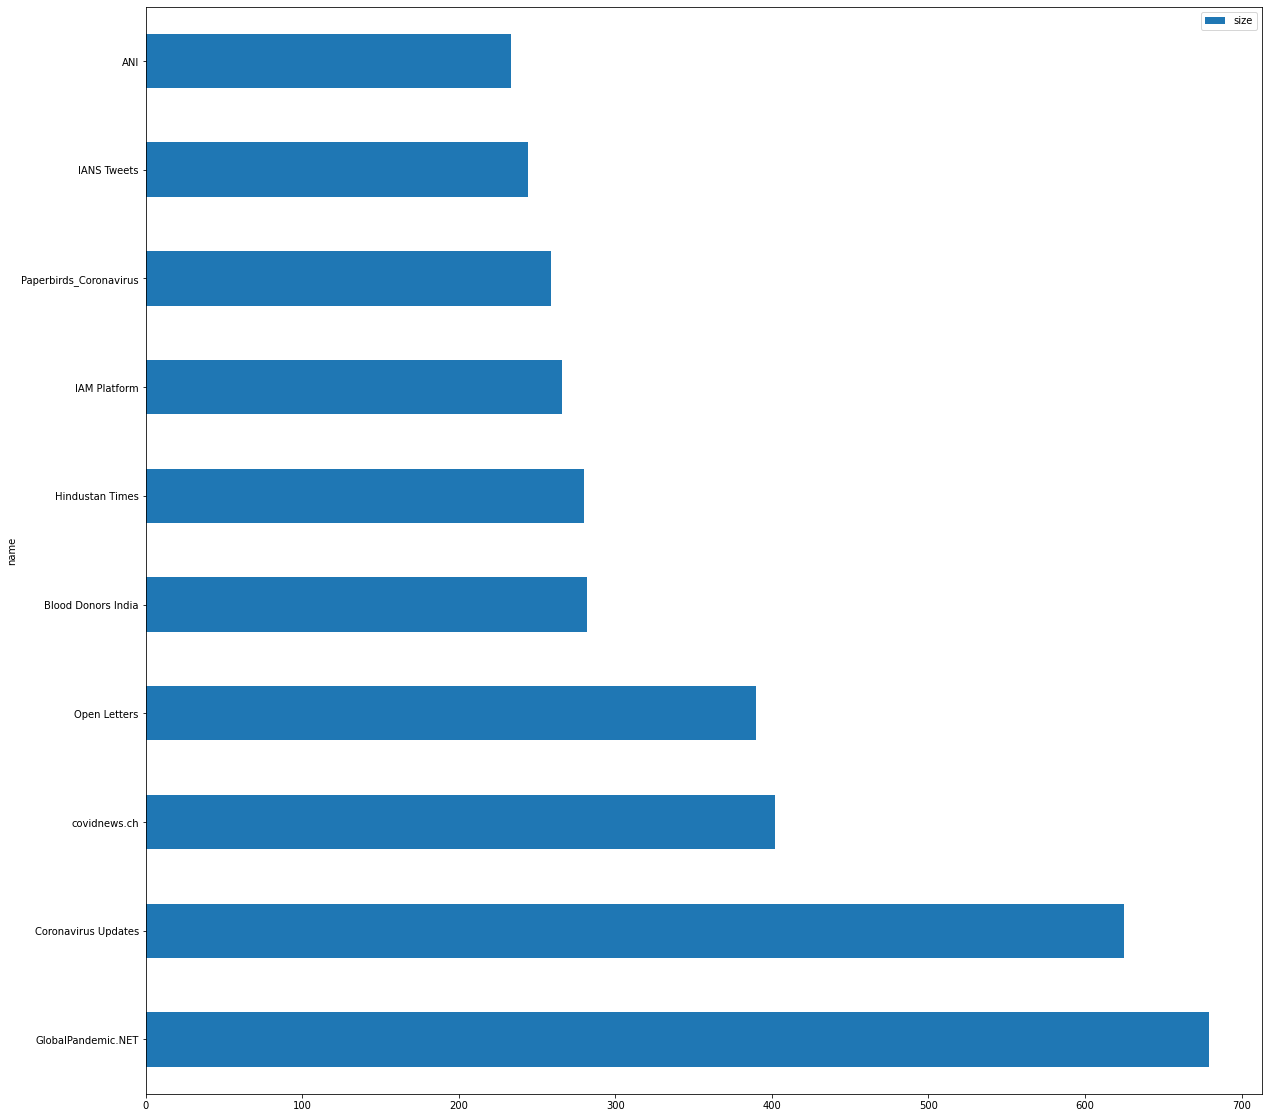

In [ ]:
df_user.plot.barh(x= 'name', y= 'size', figsize = (20,20))

### tìm 10 user có lượt follow cao nhất, hiển thị ra dạng barchart

In [ ]:
df_folower = df_covid.sort_values('user_followers', ascending=False)


In [ ]:
df_folower

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
104946,CNN,NaN,It’s our job to #GoThere & tell the most diffi...,2007-02-09 00:35:02,49442559,1109,1424,True,2020-08-11 09:26:02,"""Thought I'd show you what #Covid19 does to yo...",['Covid19'],SocialFlow,False
174909,National Geographic,Global,Taking our understanding and awareness of the ...,2008-11-18 21:28:10,24359165,147,6978,True,2020-08-30 00:10:04,Though no easy fix has been discovered for #CO...,['COVID19'],Khoros,False
6959,CGTN,"Beijing, China",#SeeTheDifference with CGTN as we bring you st...,2013-01-24 03:18:59,13892841,69,104,True,2020-07-25 08:00:00,#VoicesfromBeltandRoad: #COVID19 rap song aler...,"['VoicesfromBeltandRoad', 'COVID19']",Twitter Media Studio,False
13450,CGTN,"Beijing, China",#SeeTheDifference with CGTN as we bring you st...,2013-01-24 03:18:59,13892839,69,104,True,2020-07-25 02:43:57,#China's civil aviation recovers as daily flig...,['China'],Twitter Web App,False
16194,CGTN,"Beijing, China",#SeeTheDifference with CGTN as we bring you st...,2013-01-24 03:18:59,13892837,69,104,True,2020-07-25 00:27:38,"On Friday, the #Chinese mainland reported:\n \...","['Chinese', 'Xinjiang']",Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127964,Cygnus Professionals Inc.,NaN,Cygnus Professionals Inc. is a next-generation...,2020-02-24 09:47:21,0,0,0,False,2020-08-14 05:00:11,Blockchain can be used for tracking public hea...,NaN,Postfity.com,False
175996,Anna Lisa Valderrama,NaN,Litigation Paralegal,2020-05-15 18:25:18,0,1,0,False,2020-08-29 22:49:28,How Bad is #COVID19 in TX Nursing Homes? | Cor...,['COVID19'],"Clearview Social, Inc.",False
53096,Covid π = Death,NaN,"By Donald Trump's description of John McCain, ...",2020-06-23 00:01:09,0,16,24,False,2020-08-01 18:40:54,He said he thinks you'll get over it @realDona...,NaN,Twitter for Android,False
159549,Mohammed Zaid khilji,NaN,My youtube channel link.... https://t.co/K0b4f...,2020-08-14 11:18:01,0,13,29,False,2020-08-22 07:07:42,Sab afford nahi kar sak tay personal vehicle p...,"['neetjeepostpone', 'NarendraModi', 'healthy']",Twitter for Android,False


In [ ]:
df_folower = df_folower.drop_duplicates(subset='user_name', keep="first")

In [ ]:
df_folower = df_folower[['user_name', 'user_followers']]

In [ ]:
df_folower = df_folower.nlargest(10,'user_followers')

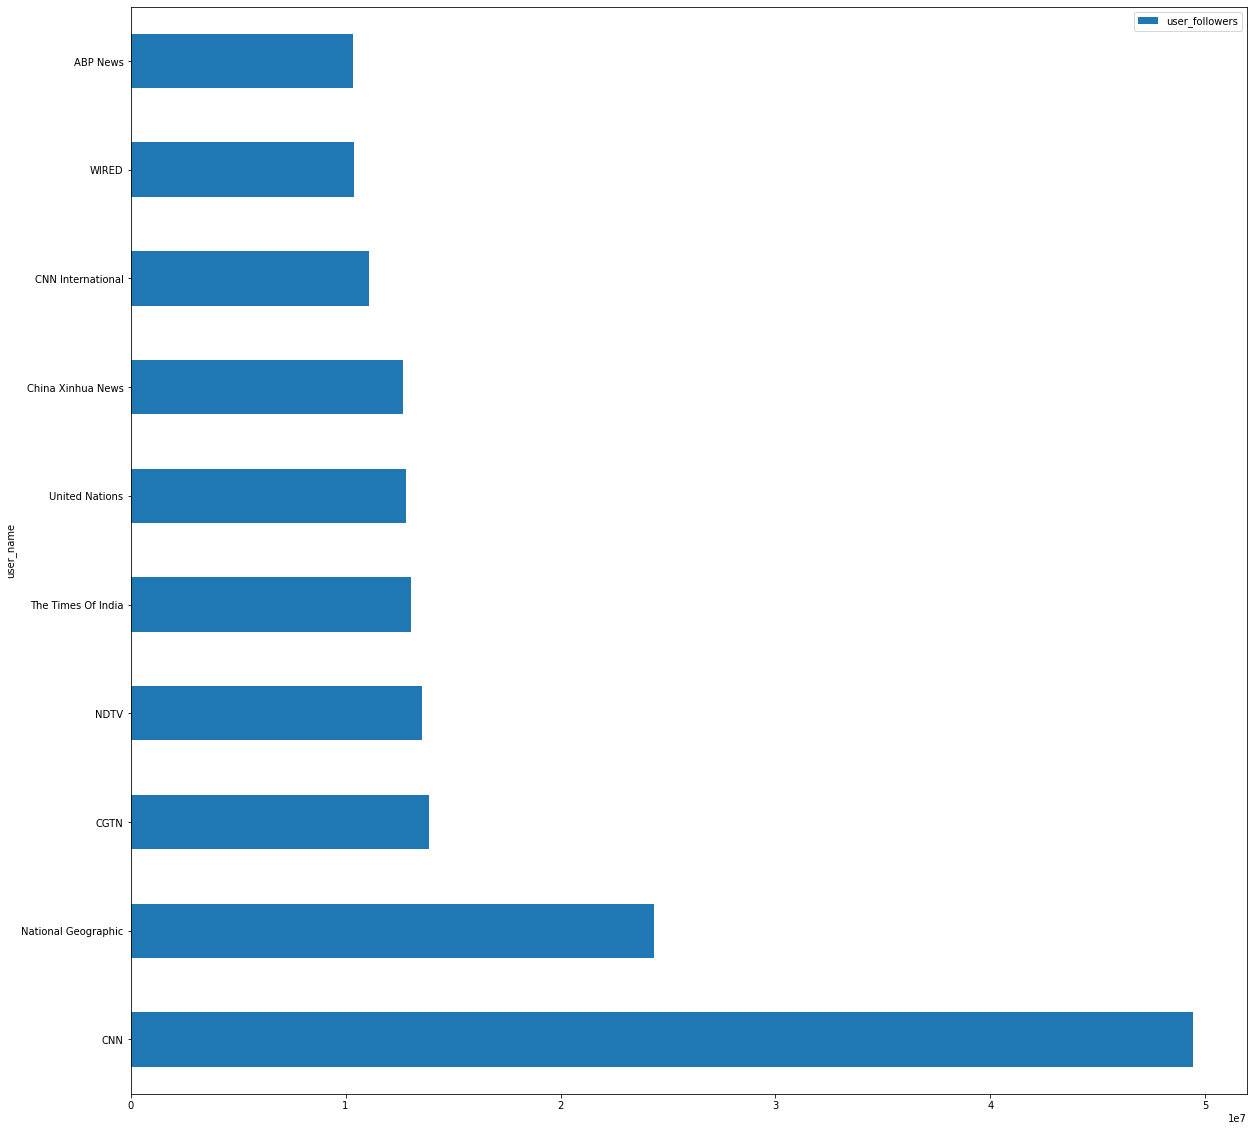

In [ ]:
df_folower.plot.barh(x= 'user_name', y= 'user_followers', figsize = (20,20))

### thống kê theo location

In [ ]:
df_location = df_covid['user_location'].value_counts().reset_index()
df_location.columns = ['user_location', 'count']
df_location = df_location[df_location['user_location']!='NA']
df_location = df_location.sort_values(['count'])

In [ ]:
df_location

,user_location,count
13459,Plateau State,1
17952,New York / London / Singapore,1
17951,gratitude jar 🌷,1
17950,Bahrain/London/Paris,1
17949,"Washington county, Maine",1
...,...,...
4,"Washington, DC",1354
3,"Mumbai, India",1401
2,"New Delhi, India",1721
1,United States,2455


In [ ]:
df_location = df_location.nlargest(10,'count')

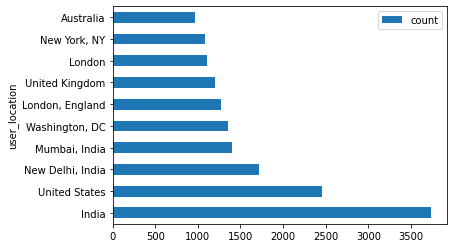

In [ ]:
df_location.plot.barh(x= 'user_location', y = 'count')

### thống kê theo thiết bị người dùng

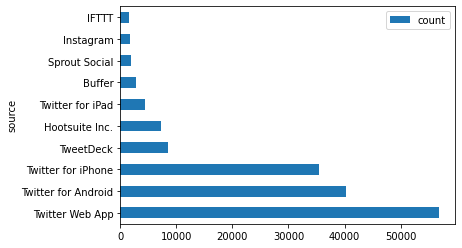

In [ ]:
df_device = df_covid['source'].value_counts().reset_index()
df_device.columns = ['source', 'count']
df_device = df_device.sort_values(['count'])
df_device = df_device.nlargest(10,'count')
df_device.plot.barh(x= 'source', y = 'count')


### phân tích hashtag

#### clear dữ liệu trống

In [ ]:
df_covid['hashtags'] = df_covid['hashtags'].fillna('[]')

#### tạo một cột mới đếm số lượng hashtags

In [ ]:
df_covid['hashtags_count'] = df_covid['hashtags'].apply(lambda x: len(x.split(',')))
df_covid.loc[df_covid['hashtags'] == '[]', 'hashtags_count'] = 0

In [ ]:
df_covid['hashtags_count'].describe()

count    179108.000000
mean          1.485104
std           1.563279
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          17.000000
Name: hashtags_count, dtype: float64

In [ ]:
df_covid.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,hashtags_count
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,[],Twitter for iPhone,False,0
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,[],Twitter for Android,False,0
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,1
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,1
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,2


#### hiển thị số lượng hashtag được nhắc nhiều nhất

In [ ]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS
def build_wordcloud(df, title):
    wordcloud = WordCloud(
        background_color='gray', 
        stopwords=set(STOPWORDS), 
        max_words=50, 
        max_font_size=40, 
        random_state=666
    ).generate(str(df))

    fig = plt.figure(1, figsize=(14,14))
    plt.axis('off')
    fig.suptitle(title, fontsize=16)
    fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

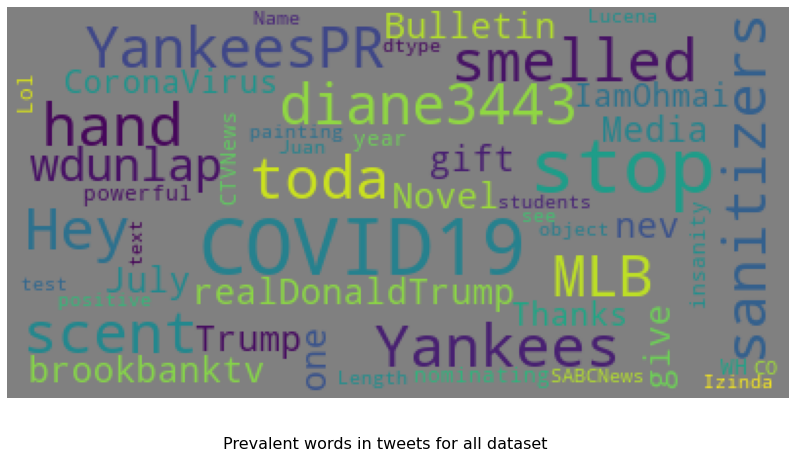

In [ ]:
build_wordcloud(df_covid['text'], 'Prevalent words in tweets for all dataset')